# 1.进行数据预处理

## 1.2导入所需模块

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


## 1.2读取MNIST数据

In [2]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label) = mnist.load_data()

## 1.3将features（数字图像特征值）使用reshape转换
将原本 28*28 的数字图像以 reshape 转换成 784 个 float 数。

In [3]:
x_Train = x_train_image.reshape(60000,784).astype('float32')
x_Test = x_test_image.reshape(10000,784).astype('float32')

## 1.4将features（数字图像特征值）标准化
将features标准化可以提高模型预测的准确度，并且更快收敛。

In [4]:
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

## 1.5label（数字真实的值）以One-Hot-Encoding进行转换
使用np_utils.to_categorical将训练数据与测试数据的label进行One-Hot-Encoding转换。

In [5]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 2.建立模型

### 我们将建立下列多层感知器模型，输入层（x）共有 784 个神经元，隐藏层（h）共有 256 个神经元，输出层（y）共有 10 个神经元。 

## 2.1导入所需模块

In [6]:
from keras.models import Sequential
from keras.layers import Dense

## 2.2建立Sequential模型
建立一个线性堆叠模型，后续只需要使用 model.add() 方法将各个神经网络层加入模型即可。

In [7]:
model = Sequential()

## 2.3建立“输出层”与“隐藏层”
将“输出层”与“隐藏层”加入模型，使用 model.add() 方法加入 Dense 神经网络层。Dense神经网络层的特色是：所有的上一层与下一层的神经元都完全连接。

In [8]:
model.add(Dense(units = 256,    # 定义“隐藏层”神经元个数为256
               input_dim = 784, # 设置“输入层”神经元个数为784 
               kernel_initializer = 'normal', # 使用 normal distribution 正态分布的随机数来初始化weight（权重）与bias（偏差）
               activation = 'relu' # 定义激活函数为relu
               ))

## 2.4建立“输出层”
使用下列程序代码将建立“输出层”，使用 model.add() 方法加入Dense 神经网络层，共有 10 个神经元，对应 0-9 十个数字。并且使用 softmax 激活函数进行转换，softmax 可以将神经元的输出转换为预测每一个数字的概率。

In [9]:
model.add(Dense(units = 10, # 定义“输出层”神经元个数为10
                kernel_initializer = 'normal',# 使用 normal distribution 正态分布的随机数来初始化weight（权重）与bias（偏差）
                activation = 'softmax' # 定义激活函数为 softmax
               ))

以上建立 Dense 神经网络层不需要设置 imput_dim ，因为Keras会自动按照上一层的units是256个神经元，设置这一层的input_dim为256个神经元。

## 2.5查看模型的摘要

In [10]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 3.进行训练
### 在我们建立好深度学习模型之后，就可以使用反向传播算法进行训练了。

## 3.1定义训练方式
在训练模型之前，我们必须使用 compole 方法对训练模型进行设置，指令如下：

In [11]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',metrics = ['accuracy'])

#### compile 方法需要输入下列参数。
#### loss:设置损失函数，在深度学习中使用 cross_entropy （交叉熵）训练的效果比较好。
#### optimizer:设置训练时，在深度学习中使用 adam 优化器可以让训练更快收敛，并提高准确率。
#### metrics:设置评估模型的方式是准确率。

## 3.2开始训练
执行训练的程序代码如下：

In [12]:
train_history = model.fit(x = x_Train_normalize,
                          y = y_Train_OneHot,validation_split = 0.2,
                          epochs = 10,batch_size = 200,verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.4381 - acc: 0.8829 - val_loss: 0.2182 - val_acc: 0.9406
Epoch 2/10
 - 1s - loss: 0.1910 - acc: 0.9453 - val_loss: 0.1559 - val_acc: 0.9559
Epoch 3/10
 - 1s - loss: 0.1356 - acc: 0.9615 - val_loss: 0.1262 - val_acc: 0.9645
Epoch 4/10
 - 1s - loss: 0.1028 - acc: 0.9701 - val_loss: 0.1124 - val_acc: 0.9682
Epoch 5/10
 - 1s - loss: 0.0812 - acc: 0.9770 - val_loss: 0.0984 - val_acc: 0.9712
Epoch 6/10
 - 1s - loss: 0.0660 - acc: 0.9819 - val_loss: 0.0936 - val_acc: 0.9722
Epoch 7/10
 - 1s - loss: 0.0544 - acc: 0.9851 - val_loss: 0.0912 - val_acc: 0.9737
Epoch 8/10
 - 1s - loss: 0.0459 - acc: 0.9876 - val_loss: 0.0833 - val_acc: 0.9759
Epoch 9/10
 - 1s - loss: 0.0380 - acc: 0.9904 - val_loss: 0.0826 - val_acc: 0.9759
Epoch 10/10
 - 1s - loss: 0.0316 - acc: 0.9918 - val_loss: 0.0807 - val_acc: 0.9767


### 以上程序代码说明如下：
#### 使用 model.fit 进行训练，训练过程会存储在 train_history 变量中，需输入下列参数。
#### （1）输入训练数据参数
#### x=x_Train_normalize（features数字图像的特征值）。
#### y=y_Train_OneHot（label数字图像真实的值）。
#### （2）设置训练与验证数据比例
#### 设置参数 validation_split=0.2。
##### 训练之前Keras会自动将数据分成：80%作为训练数据，20%作为验证数据。因为全部数据是
##### 60000项，所以分成：60000*0.8=48000 项作为训练数据，60000*0.2=12000 项作为验证数据。
#### （3）设置epoch（训练周期）次数与每一批次项数
#### epochs=10:执行10个训练周期。
#### batch_size=200:每一批次200项数据。
#### （4）设置显示训练过程
#### verbose=2:显示训练过程。
### 以上程序代码共执行了10次训练周期，每一次训练执行下列功能：
#### a.使用 48000 项训练数据进行训练，分为每一批次 200 项，所以大约分为 240 个批次（48000/200=240）进行训练。
#### b.训练完成后，会计算这个训练周期的准确率与误差，并且在 train_history 中新增一项数据记录。
#### 从以上执行结果可知，共执行了10个训练周期，并可以法相误差越来越像，准确率越来越高。

### 3.3建立show_train_history显示训练过程
之前的训练步骤会将每一个训练周期的准确率与误差记录在 train_history 变量中。我们可以使用下面的程序代码读取 train_history，以图表显示训练过程。

In [13]:
%matplotlib inline 
# 设置matplotlib 在jupyter note 网页内显示图形，如果少了这一指令，就会另打开一个窗口显示图形。
import matplotlib.pyplot as plt
def show_train_history(train_history,
                      train, # 训练数据的执行结果
                      validation # 验证数据的执行结果
                      ):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History') # 显示图的标题
    plt.ylabel(train) # 显示y轴的标签
    plt.xlabel('Epoch') # 设置x轴的标签是‘Epoch’
    plt.legend(['train','validation'],loc='upper left') # 设置图例是显示'train''validation'，位置在左上角
    plt.show()

## 3.4画出准确率执行结果
准确率评估的执行结果：

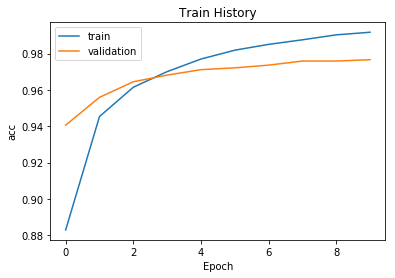

In [14]:
show_train_history(train_history,'acc','val_acc')

### 由上图可知，“acc 训练的准确率”是蓝色的，“val_acc验证的准确率”是黄色的，共执行10个周期，可以发现：
a.无论是训练还是验证，准确率都越来越高
b.在epoch训练后期，“acc训练的准确率”比“val_acc验证的准确率”高。

### 为何“acc训练的准确率”比“val_acc验证的准确率”高？
因为是计算准确率的数据不同。
#### acc训练的准确率：以训练的数据来计算准确率，因为相同的数据已经训练过了，又拿来计算准确率，所以准确率会比较高。
#### val_acc验证的准确率：以验证数据来计算准确率，这些验证数据在之前训练时并未训练，所以计算的准确率会比较低。但是，这样计算出来的准确率比较客观，比较符合真实情况。

如果“acc训练的准确率”一直在增加，但是“val_acc验证的准确率”一直没有增加，就可能是过度拟合（overfitting）的现象。从上图可以看出，前者比后者高，虽然差异不是很大，但仍有轻微过度拟合的现象。

## 3.4画出误差执行结果

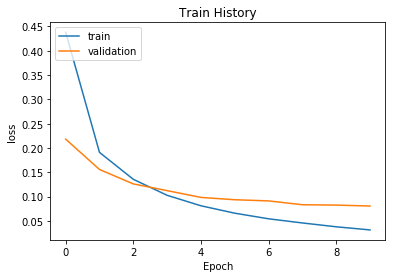

In [15]:
show_train_history(train_history,'loss','val_loss')

在上图中，“loss训练的误差”是蓝色的，“val_loss验证的误差”是黄色的，总共执行了10个训练周期。可以发现：
a.无论是训练还是验证，验证的误差都越来越低。
b.在Epoch训练后期，“loss训练的误差”比“val_loss验证的误差”小。

# 4.以测试数据评估模型准确率
之前我们已经完成了训练，现在要使用test测试数据来评估模型准确率。

## 4.1评估模型准确率

In [16]:
scores = model.evaluate( # 使用 model.evaluate 评估模型的准确率，评估后的准确率会存储在scores中。
    x_Test_normalize, # 测试数据的features（数字图像的特征值）
    y_Test_OneHot # 测试数据的label（数字图像真实的值）
)
print()
print('accuracy=',scores[1]) # 显示准确率

10000/10000 [==============================] - 0s 21us/step

accuracy= 0.9765


准确率为97%

# 5.进行预测
通过之前的步骤，我们建立了模型，并且完成了模型训练，准确率达到还可以接受的 0.97 ，接下来我们将使用此模型进行预测。

## 5.1执行预测
我们可以用下列指令执行预测：

In [17]:
prediction = model.predict_classes(x_Test)

以上代码使用 model.predict_classes 输入参数 x_Test （测试数据的数字图像）进行预测，预测结果存储在 prediction 变量中。

## 5.2预测结果
用下列指令查看预测结果的前10项数据。

In [18]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

可以看到第1项预测的结果是7，第2项预测是2，and so on.

## 5.3显示10项预测结果
使用上一章创建的 plot_images_labels_prediction 函数显示预测结果，输入参数：
x_test_image（测试数据图像）、y_test_label（测试数据真实的值）、prediction（预测结果）和
idx=340（显示第 340 到 349 共 10 项）。

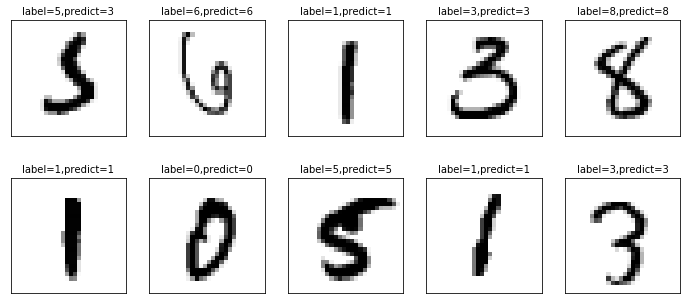

In [19]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)# 设置显示图像大小
    if num>25:num=25 # 如果显示项数参数大于25，就设置为25，以免发生错误
    for i in range(0,num): # for循环执行程序块内的程序代码，画出num个数字图像
        ax = plt.subplot(5,5,1+i) # 建立subgraph子图像为5行5列
        ax.imshow(images[idx],cmap='binary') # 画出subgraph子图像
        title = "label=" + str(labels[idx]) # 设置子图形title，显示标签字段
        if len(prediction)>0:
            title+=',predict='+str(prediction[idx]) # 标题
            
        ax.set_title(title,fontsize=10) # 设置子图像标题
        ax.set_xticks([]);ax.set_yticks([]) # 设置不显示刻度
        idx+=1 # 读取下一项
    plt.show()
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340)

我们看到有一项预测错误：label（真实值）是5，但predict（预测值）是3，这个数字图像真得挺随意的，容易识别错误。

# 6.显示混淆矩阵（误差矩阵）
###### 在上文中我们可以看到了一个预测错误：真实值是5，但是预测值是3。如果我们想要进一步知道在所建立的模型中哪些数字的准确率最高，哪些数字最容易混淆（例如真实值是5，但是预测值是3），就可以使用混淆矩阵（confision matrix）来显示。
###### 在机器学习领域，特别是统计分类的问题，混淆矩阵也称为误差矩阵（error matrix），是一种特定的表格显示方式，可以让我们以可视化的方式了解有监督的学习算法的结果，看出算法模型是否混淆了两个类（将某一个标签预测成为另一个标签）。

## 6.1使用 pandas crosstab 建立混淆矩阵

使用 pd.crosstab 建立混淆矩阵，输入参数见注释。

In [22]:
import pandas as pd
pd.crosstab(y_test_label,          # 测试数据数字图像的真实值
            prediction,            # 测试数据数字图像的预测结果
            rownames = ['label'],  # 设置行的名称是label
            colnames = ['predict'] # 设置列的名称是predict
           )

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,5,0,1010,1,1,0,2,4,9,0
3,0,0,2,995,0,0,0,4,5,4
4,1,0,5,1,961,0,3,0,3,8
5,3,0,0,16,1,852,7,2,8,3
6,5,3,3,1,3,3,938,0,2,0
7,0,5,12,6,1,0,0,990,6,8
8,5,0,3,5,1,1,1,2,955,1


## 6.1建立真实值与预测值 DataFrame
因为我们希望能找出真实值是 “ 5 ” 但预测值是 “3” 的数据,所以创建下列 DataFrame 。下面创建 DataFrame ，包含 label（真实值）与 prediction（预测值）。

In [24]:
df = pd.DataFrame({'label':y_test_label,'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


以上执行的结果有两个字段，分别是 label 与 predict。

## 6.3查询真实值是 “5” 但预测值 “3” 的数据
Pandas DataFrame 可以很方便地让我们查询数据。例如下面的程序代码，可以找出真实值是 “5” 但预测值是 “3” 的数据。

In [28]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
3902,5,3
4271,5,3


以上执行的结果可知共有17项，显示前7项结果。

## 6.4查看第1393项数据
我们可以查看第1393项结果，真实值是 5 但预测值是 3 。

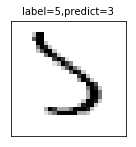

In [30]:
plot_images_labels_prediction(x_test_image,y_test_label,
                             prediction,idx=1393,num=1)

从执行结果来看，这个数字图像看起来像5又像3，所以预测错误。